In [ ]:
from google.colab import drive
from matplotlib import pyplot as plt
drive.mount('/content/gdrive')
import pandas as pd, numpy as np
df_data = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/red_wine.csv') #red_wine.csv must be inside the colab notebooks file

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
with open("/content/gdrive/MyDrive/Colab Notebooks/red_wine.csv") as file_name:
    data = np.loadtxt(file_name, delimiter=",")
    x = data[:,[0,1,2,3,4,5,6,7,8,9,10]]
    y = data[:,11]

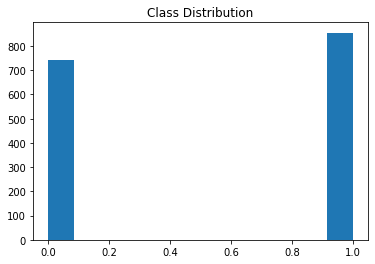

In [ ]:
plt.hist(y, bins = 'auto')
plt.title("Class Distribution") #more datapoints in class 1
plt.show()

In [ ]:
def sigmoid(x): #sigmoid function
  return 1/(1+np.exp(-x))

In [ ]:
class LR():

  def __init__(self, X, Y, alphak): #alphak is learning rate
    self.X = X
    self.Y = Y
    self.m = X.T.shape[1]
    self.n = X.T.shape[0]
    self.W = np.zeros((self.n,1)) #W is the weights for each feature
    self.alphak = alphak

  def fit(self, k): #k is number of iterations
    Xtrans = self.X.T
    Ytrans = self.Y.T
    CEL_List = []
    for i in range(k):
      A = sigmoid(np.dot(self.W.T,Xtrans)) #A is the log odds ratio
      CEL = -1*np.sum(self.Y*np.log(A)+(1-self.Y)*np.log(1-A))
      dW = (1/self.m)*np.dot(A-self.Y,self.X)
      self.W = self.W - self.alphak*dW.T
      CEL_List.append(CEL)
      # if(i%(k/10)==0):
        # print("CEL after ", i ," iteration is: ", CEL)
    return CEL_List

  def predict(self):
    Xtrans = self.X.T
    A = sigmoid(np.dot(self.W.T,Xtrans)) 
    A = A > 0.5
    A = np.array(A,dtype='int64')
    return A
    
  def accu_eval(self):
    A = self.predict() 
    acc = (1-np.sum(np.absolute(A-self.Y))/self.Y.shape[0])*100
    return acc

In [ ]:
class LRWithBias():
  def __init__(self, X, Y, alphak): #alphak is learning rate
    self.X = X
    self.Y = Y
    self.m = X.T.shape[1]
    self.n = X.T.shape[0]
    self.W = np.zeros((self.n,1)) #W is the weights for each feature
    self.alphak = alphak
    self.bias = 0 #bias added to prevent overfitting and increase accuracy

  def fit(self,k): #alphak is learning rate and k is number of iterations
    Xtrans = self.X.T
    Ytrans = self.Y.T
    CEL_List = []
    for i in range(k):
      A = sigmoid(np.dot(self.W.T,Xtrans)+self.bias) #A is the log odds ratio
      CEL = -1*np.sum(self.Y*np.log(A)+(1-self.Y)*np.log(1-A))
      dW = (1/self.m)*np.dot(A-self.Y,Xtrans.T)
      dBias = (1/self.m)*np.sum(A-self.Y)
      self.W = self.W - self.alphak*dW.T
      self.bias = self.bias - self.alphak*dBias
      CEL_List.append(CEL)
      #if(i%(k/10)==0):
        #print("CEL after ", i ," iteration is: ", CEL)
    return CEL_List
  def predict(self):
    Xtrans = self.X.T
    A = sigmoid(np.dot(self.W.T,Xtrans)+self.bias) 
    A = A > 0.5
    A = np.array(A,dtype='int64')
    return A
  def accu_eval(self):
    A = self.predict() 
    acc = (1-np.sum(np.absolute(A-self.Y))/self.Y.shape[0])*100
    return acc

In [ ]:
it = 10000
lr = 2.5

lrModel = LR(x,y,lr)
clist2 = lrModel.fit(it)
print("Accuracy is:", lrModel.accu_eval())
lrBiasModel = LRWithBias(x,y,lr)
clist1 = lrBiasModel.fit(it)
print("Accuracy (with Bias) is:", lrBiasModel.accu_eval())

Accuracy is: 74.29643527204503
Accuracy (with Bias) is: 74.42151344590368


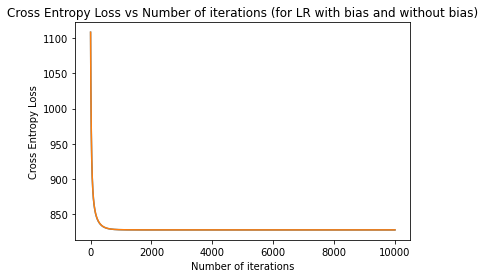

In [ ]:
plt.plot(np.arange(it),clist1)
plt.plot(np.arange(it),clist2)
plt.xlabel("Number of iterations")
plt.ylabel("Cross Entropy Loss")
plt.title("Cross Entropy Loss vs Number of iterations (for LR with bias and without bias)")
plt.show() #We find that CEL for LR with bias is lower than without bias at every iteration

In [ ]:
class kfold_split():

  def __init__(self, x, y, folds):
    self.x = x
    self.y = y
    np.random.shuffle(x)
    np.random.shuffle(y)
    self.folds = folds
    self.splits = self.split()

  def split(self):
    xSplit = np.array_split(self.x, self.folds)
    ySplit = np.array_split(self.y, self.folds)
    return [xSplit, ySplit]
    
  def crossValidate(self, lr, iterations):
    accuracies = []
    for i in range(self.folds):
      x = self.splits[0][i]
      y = self.splits[1][i]
      model = LR(x, y, lr)
      model.fit(iterations)
      accuracies.append(model.accu_eval())
    return np.mean(accuracies)

  def crossValidateWithBias(self, lr, iterations):
    accuracies = []
    for i in range(self.folds):
      x = self.splits[0][i]
      y = self.splits[1][i]
      model = LRWithBias(x, y, lr)
      model.fit(iterations)
      accuracies.append(model.accu_eval())
    return np.mean(accuracies)

In [ ]:
tenFold = kfold_split(x, y, 10)
print("Cross Validation accuracy:", tenFold.crossValidate(lr, it))
print("Cross Validation accuracy (with Bias):", tenFold.crossValidateWithBias(lr,it))

Cross Validation accuracy: 60.16430817610063
Cross Validation accuracy (with Bias): 60.72562893081761


In [ ]:
lrRange = np.linspace(0, 15, 10)
r = []
for i in lrRange:
  r.append(tenFold.crossValidateWithBias(i, it))

Text(0.5, 1.0, 'Learning rate vs Accuracy (for set number of iterations)')

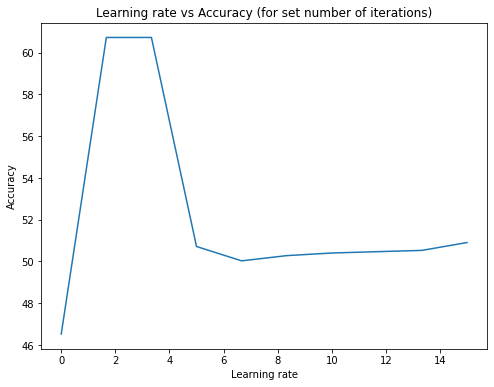

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(lrRange, r)
plt.xlabel("Learning rate")
plt.ylabel("Accuracy")
plt.title("Learning rate vs Accuracy (for set number of iterations)")

[[ 1.43280187]
 [-4.83945768]
 [-1.28577046]
 [ 0.81458106]
 [-2.41317907]
 [ 1.57021945]
 [-4.67882545]
 [-0.71071545]
 [-0.64179896]
 [ 4.650272  ]
 [ 5.60946903]] [[ 1.53082673]
 [-4.79227006]
 [-1.27470901]
 [ 0.80442136]
 [-2.3459178 ]
 [ 1.57789775]
 [-4.63967455]
 [-0.68614114]
 [-0.4865658 ]
 [ 4.66664898]
 [ 5.63766386]]


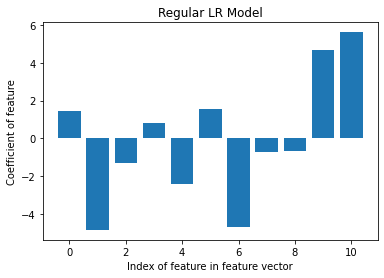

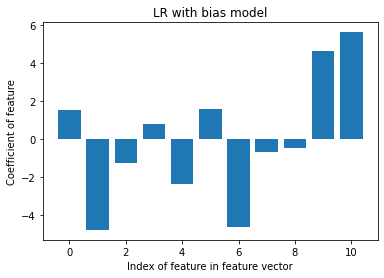

In [ ]:
xRange = range(11)
plt.bar(xRange, np.ndarray.flatten(lrModel.W))
plt.xlabel("Index of feature in feature vector")
plt.ylabel("Coefficient of feature")
plt.title("Regular LR Model")
plt.show()
plt.bar(xRange, np.ndarray.flatten(lrBiasModel.W))
plt.title("LR with bias model")
plt.xlabel("Index of feature in feature vector")
plt.ylabel("Coefficient of feature")
plt.show()

In [ ]:
newx = np.delete(x,8,1) #Deleting 8th feature
tenFold = kfold_split(newx, y, 10)
print("Cross Validation accuracy:", tenFold.crossValidate(lr, it))
print("Cross Validation accuracy (with Bias):", tenFold.crossValidateWithBias(lr,it))

Cross Validation accuracy: 59.41352201257862
Cross Validation accuracy (with Bias): 60.1002358490566


In [ ]:
extract = x[:,10] #adding square of feature 10 to existing features
sqextract = np.square(extract)
sqextract = sqextract.reshape(sqextract.shape[0],1)
newx = np.hstack((x,sqextract))
tenFold = kfold_split(newx, y, 10)
print("Cross Validation accuracy:", tenFold.crossValidate(lr, it))
print("Cross Validation accuracy (with Bias):", tenFold.crossValidateWithBias(lr,it))

Cross Validation accuracy: 60.03734276729559
Cross Validation accuracy (with Bias): 60.1627358490566
